In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [87]:
df = pd.read_csv('gpu0.log', skiprows=[0])
df.columns = ["date", "id", "gpu utilization in %", "memory utilization in %", "encoder utilization in %", "decoder util8zation in %", "temperature in C", "power draw in W" ]
# df.date=df.date.apply(lambda x: x.split(".")[0])
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d:%H:%M:%S.%f')

df['time'] = df.date.astype(int)
t0 = df['time'][0]
df['time'] = (df['time'] - t0) / 10000000

# df['seconds'] = df['seconds'].dt.total_seconds()
df

# df.info()


,date,id,gpu utilization in %,memory utilization in %,encoder utilization in %,decoder util8zation in %,temperature in C,power draw in W,time
0,2022-05-22 16:54:15.760601,0,0,0,0,0,26,52.17,0.000000e+00
1,2022-05-22 16:54:16.320884,0,0,0,0,0,26,52.17,5.602830e+01
2,2022-05-22 16:54:16.676459,0,0,0,0,0,26,52.17,9.158580e+01
3,2022-05-22 16:54:17.094894,0,0,0,0,0,26,52.17,1.334293e+02
4,2022-05-22 16:54:17.470884,0,0,0,0,0,26,52.17,1.710283e+02
...,...,...,...,...,...,...,...,...,...
46193,2022-05-22 21:41:44.280181,0,0,0,0,0,27,75.44,1.724852e+06
46194,2022-05-22 21:41:44.786542,0,100,3,0,0,27,78.39,1.724903e+06
46195,2022-05-22 21:41:45.182841,0,100,3,0,0,27,78.07,1.724942e+06
46196,2022-05-22 21:41:45.555073,0,100,3,0,0,27,75.44,1.724979e+06


In [88]:
df

,date,id,gpu utilization in %,memory utilization in %,encoder utilization in %,decoder util8zation in %,temperature in C,power draw in W,time
0,2022-05-22 16:54:15.760601,0,0,0,0,0,26,52.17,0.000000e+00
1,2022-05-22 16:54:16.320884,0,0,0,0,0,26,52.17,5.602830e+01
2,2022-05-22 16:54:16.676459,0,0,0,0,0,26,52.17,9.158580e+01
3,2022-05-22 16:54:17.094894,0,0,0,0,0,26,52.17,1.334293e+02
4,2022-05-22 16:54:17.470884,0,0,0,0,0,26,52.17,1.710283e+02
...,...,...,...,...,...,...,...,...,...
46193,2022-05-22 21:41:44.280181,0,0,0,0,0,27,75.44,1.724852e+06
46194,2022-05-22 21:41:44.786542,0,100,3,0,0,27,78.39,1.724903e+06
46195,2022-05-22 21:41:45.182841,0,100,3,0,0,27,78.07,1.724942e+06
46196,2022-05-22 21:41:45.555073,0,100,3,0,0,27,75.44,1.724979e+06


In [91]:
data = pd.DataFrame(df, columns=["time", "gpu utilization in %", "memory utilization in %"])
data = data.set_index("time")
# data = data.head(100)
data

,gpu utilization in %,memory utilization in %
time,,
0.000000e+00,0,0
5.602830e+01,0,0
9.158580e+01,0,0
1.334293e+02,0,0
1.710283e+02,0,0
...,...,...
1.724852e+06,0,0
1.724903e+06,100,3
1.724942e+06,100,3


<AxesSubplot:xlabel='time'>

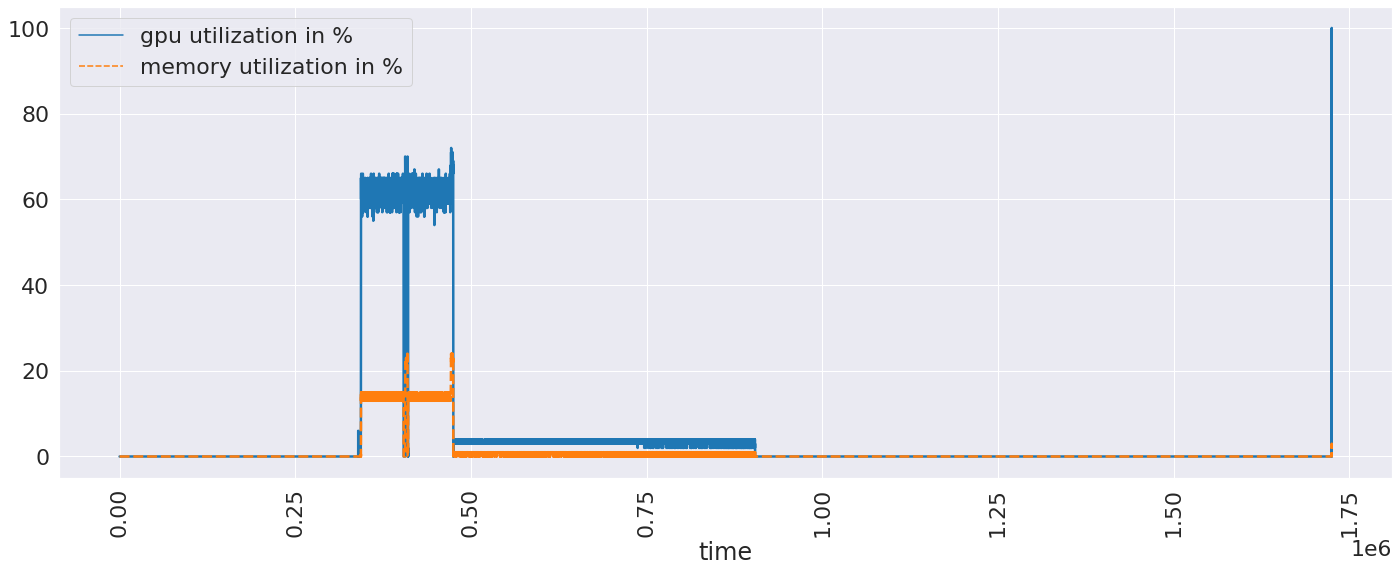

In [92]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale = 2)
plt.xticks(rotation=90)
plt.tight_layout()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)


<AxesSubplot:>

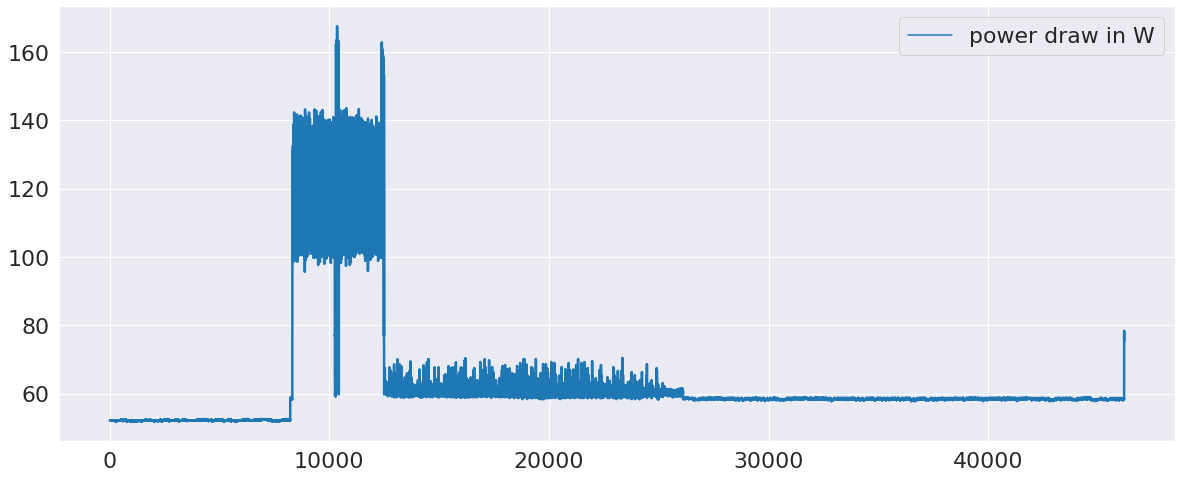

In [97]:
energy = pd.DataFrame(df, columns=["power draw in W"])
sns.lineplot(data=energy, palette="tab10", linewidth=2.5)

<AxesSubplot:>

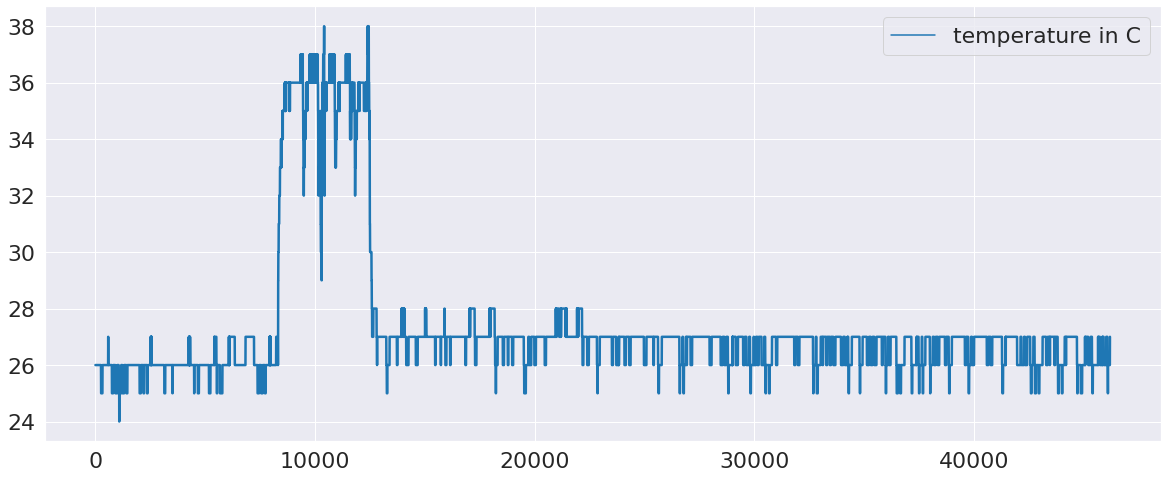

In [98]:
temp = pd.DataFrame(df, columns=["temperature in C"])
sns.lineplot(data=temp, palette="tab10", linewidth=2.5)